In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import scienceplots as scp
import seaborn as sns

import numpy as np
import torch

matplotlib.rcParams['figure.figsize'] = (20, 6)

import sys
sys.path.append("..")

from argparse import Namespace
from main import main, parse_args
from utils.plotting import *
from utils.analysis import process_outputs, get_change_responses, get_omission_responses

from utils.data import load_results_files

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
import importlib 
import utils.plotting
importlib.reload(utils.plotting)
from utils.plotting import *

In [2]:
# load results for the full model
active_args, active_change, active_omission, active_progress = load_results_files("../results/main_model", "perception_action")
active_args = Namespace(**active_args)

#### Perception only

In [4]:
passive_args, passive_change, passive_omission, passive_progress = load_results_files(f"../results/main_model", "perception_only")
passive_args = Namespace(**passive_args)

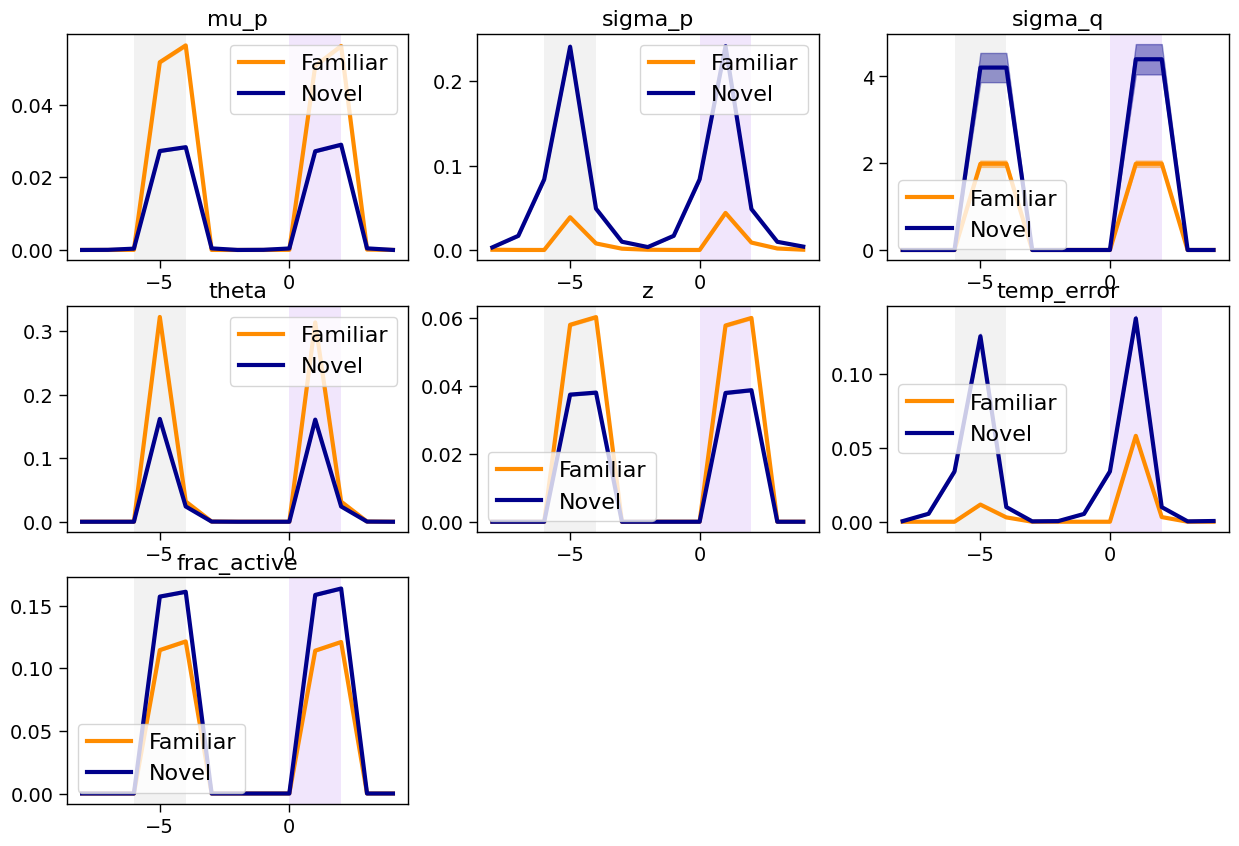

In [5]:
# Change Responses

with plt.style.context(['nature', 'notebook']):

    ponly_change_fig = plt.figure(figsize=(15, 10))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(passive_change['familiar'].keys()):
        ax = plt.subplot(3, 3, i+1)
        _ = plot_trial_responses(passive_args, ax, passive_change['familiar'][pop], passive_change['novel'][pop], normalize=False)
        _ = ax.set_title(f"{pop}")
        _ = ax.legend()

In [ ]:
ponly_change_fig.savefig("../figures/figure_5/perception_only_change_responses.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

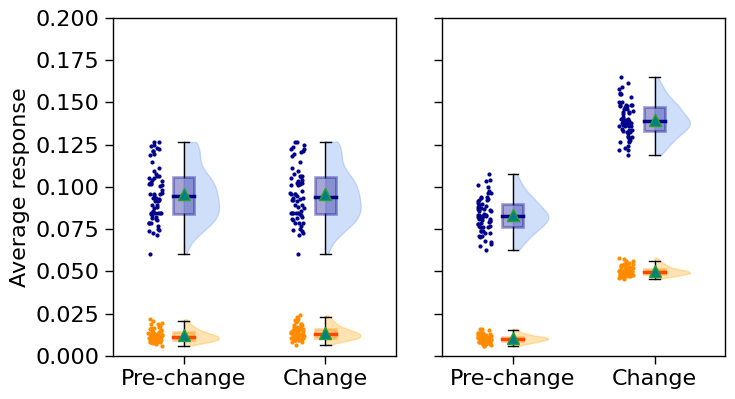

In [6]:
# Raincloud plots

with plt.style.context(['nature', 'notebook']):

    fam_pa = active_change['familiar_means']['sigma_p'].detach()
    nov_pa = active_change['novel_means']['sigma_p'].detach()

    fam_p = passive_change['familiar_means']['sigma_p'].detach()
    nov_p = passive_change['novel_means']['sigma_p'].detach()
    
    vip_rain, vip_rain_ax = plt.subplots(1, 2, figsize=(7, 4), sharey=True)
    plt.tight_layout()

    # perception only
    raincloud_plot(vip_rain_ax[0], fam_p[..., 0].mean(0), fam_p[..., 1].mean(0), xlabels=['Pre-change', 'Change'], marker_sz=4, color_scheme=0)
    raincloud_plot(vip_rain_ax[0], nov_p[..., 0].mean(0), nov_p[..., 1].mean(0), xlabels=['Pre-change', 'Change'], marker_sz=4, color_scheme=1)

    vip_rain_ax[0].set_ylim([0., 0.2])

    # perception action
    raincloud_plot(vip_rain_ax[1], fam_pa[..., 0].mean(0), fam_pa[..., 1].mean(0), xlabels=['Pre-change', 'Change'], marker_sz=4, color_scheme=0)
    raincloud_plot(vip_rain_ax[1], nov_pa[..., 0].mean(0), nov_pa[..., 1].mean(0), xlabels=['Pre-change', 'Change'], marker_sz=4, color_scheme=1)

    vip_rain_ax[1].set_ylim([0., 0.2])
    vip_rain_ax[1].set_ylabel("")

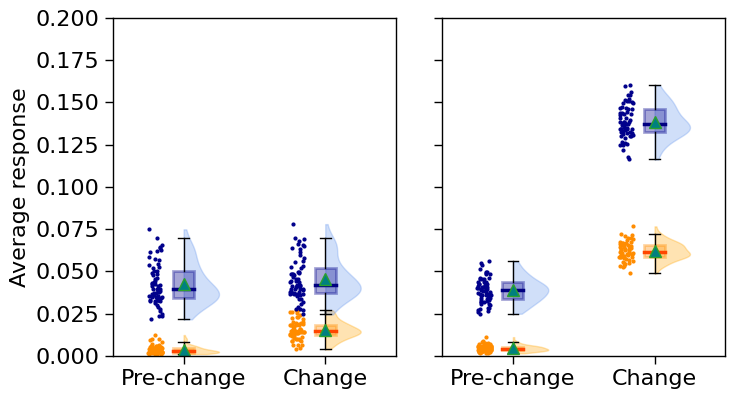

In [7]:
# Raincloud plots

with plt.style.context(['nature', 'notebook']):

    fam_pa = active_change['familiar_means']['temp_error'].detach()
    nov_pa = active_change['novel_means']['temp_error'].detach()

    fam_p = passive_change['familiar_means']['temp_error'].detach()
    nov_p = passive_change['novel_means']['temp_error'].detach()
    
    temp_rain, temp_rain_ax = plt.subplots(1, 2, figsize=(7, 4), sharey=True)
    plt.tight_layout()

    # perception only
    raincloud_plot(temp_rain_ax[0], fam_p[..., 0].mean(0), fam_p[..., 1].mean(0), xlabels=['Pre-change', 'Change'], marker_sz=4, color_scheme=0)
    raincloud_plot(temp_rain_ax[0], nov_p[..., 0].mean(0), nov_p[..., 1].mean(0), xlabels=['Pre-change', 'Change'], marker_sz=4, color_scheme=1)

    temp_rain_ax[0].set_ylim([0.0, 0.2])

    # perception action
    raincloud_plot(temp_rain_ax[1], fam_pa[..., 0].mean(0), fam_pa[..., 1].mean(0), xlabels=['Pre-change', 'Change'], marker_sz=4, color_scheme=0)
    raincloud_plot(temp_rain_ax[1], nov_pa[..., 0].mean(0), nov_pa[..., 1].mean(0), xlabels=['Pre-change', 'Change'], marker_sz=4, color_scheme=1)

    temp_rain_ax[1].set_ylim([0.0, 0.2])
    temp_rain_ax[1].set_ylabel("")

In [ ]:
vip_rain.savefig("../figures/figure_5/vip_perception_vs_action.pdf", dpi=600, bbox_inches="tight", pad_inches=0)
temp_rain.savefig("../figures/figure_5/temp_perception_vs_action.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

#### Energy Efficiency

In [8]:
# load results for the full model
energy_args, energy_change, energy_omission, energy_progress = load_results_files("../results/main_model", "no_energy")
energy_args = Namespace(**energy_args)

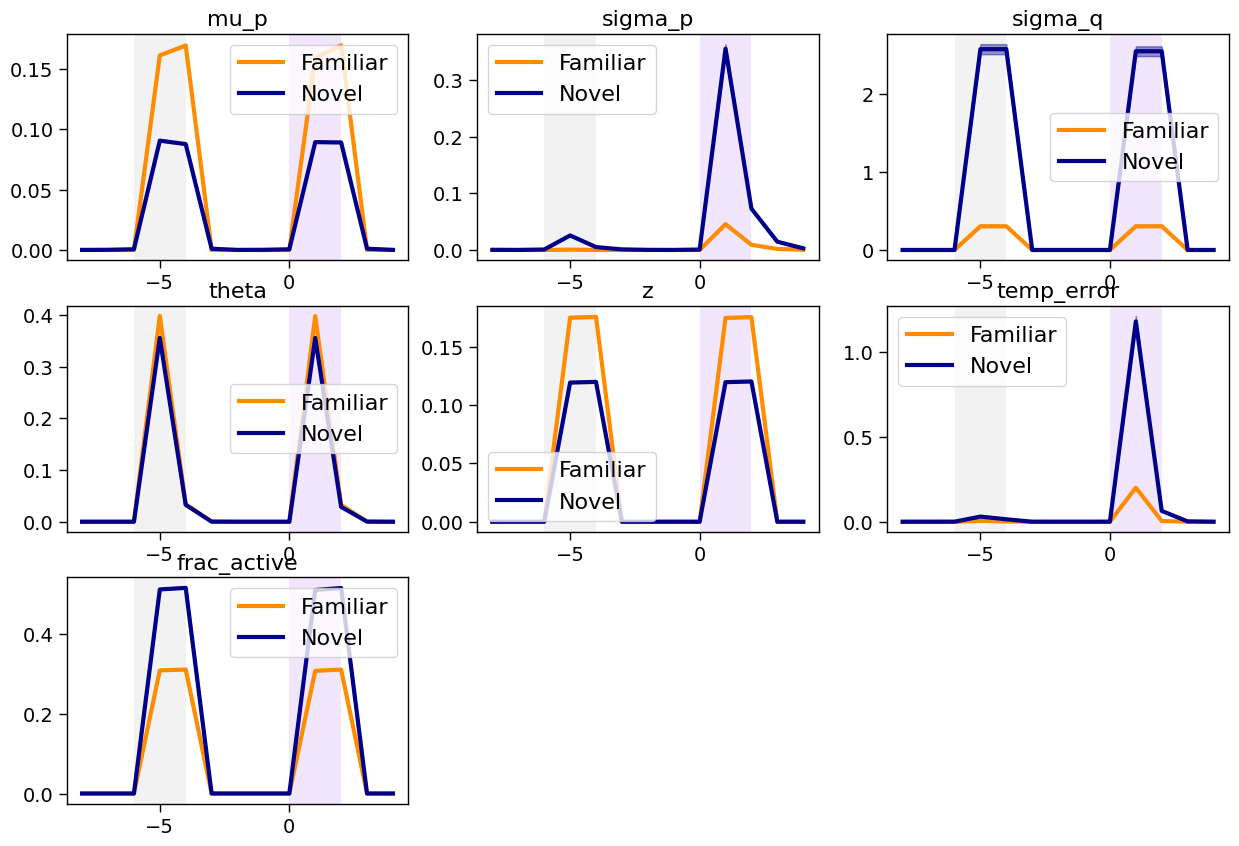

In [9]:
# Change Responses

with plt.style.context(['nature', 'notebook']):

    energy_fig = plt.figure(figsize=(15, 10))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(passive_change['familiar'].keys()):
        ax = plt.subplot(3, 3, i+1)
        _ = plot_trial_responses(energy_args, ax, energy_change['familiar'][pop], energy_change['novel'][pop], normalize=False)
        _ = ax.set_title(f"{pop}")
        _ = ax.legend()

In [ ]:
energy_fig.savefig("../figures/figure_5/no_energy_change_responses.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

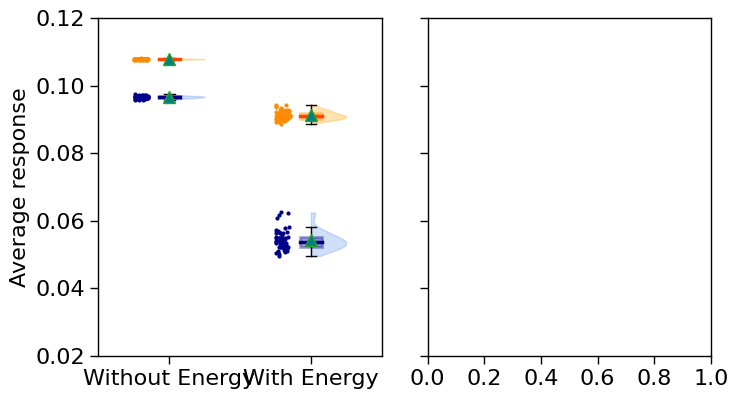

In [10]:
# Raincloud plots

with plt.style.context(['nature', 'notebook']):

    fam_pa = active_change['familiar_means']['theta'].detach()
    nov_pa = active_change['novel_means']['theta'].detach()

    fam_energy = energy_change['familiar_means']['theta'].detach()
    nov_energy = energy_change['novel_means']['theta'].detach()
    
    theta_rain, theta_rain_ax = plt.subplots(1, 2, figsize=(7, 4), sharey=True)
    plt.tight_layout()

    # we will average pre-change and change response since theta doesn't have a change response anyways

    raincloud_plot(theta_rain_ax[0], fam_energy.mean(0).mean(-1), fam_pa.mean(0).mean(-1), xlabels=['Without Energy', 'With Energy'], marker_sz=4, color_scheme=0)
    raincloud_plot(theta_rain_ax[0], nov_energy.mean(0).mean(-1), nov_pa.mean(0).mean(-1), xlabels=['Without Energy', 'With Energy'], marker_sz=4, color_scheme=1)

    theta_rain_ax[0].set_ylim([0.02, 0.12])

In [ ]:
theta_rain.savefig("../figures/figure_5/theta_rain_no_energy.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

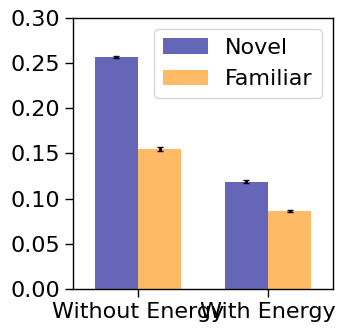

In [11]:
# Fraction active bar plot

with plt.style.context(['nature', 'notebook']):

    fam_len, nov_len = len(active_change['familiar_means']['frac_active']), len(active_change['novel_means']['frac_active'])
    fam_energy_len, nov_energy_len = len(energy_change['familiar_means']['frac_active']), len(energy_change['novel_means']['frac_active'])

    # fraction active in the full model case average across prechange and change
    pa_fam, pa_fam_err = compute_population_stats(active_change['familiar_means']['frac_active'].mean(-1).numpy(), alpha=0.000000001)
    pa_nov, pa_nov_err = compute_population_stats(active_change['novel_means']['frac_active'].mean(-1).numpy(), alpha=0.000000001)

    # fraction active in the no energy case averaged across prechange and change
    energy_fam, energy_fam_err = compute_population_stats(energy_change['familiar_means']['frac_active'].mean(-1).numpy(), alpha=0.000000001)
    energy_nov, energy_nov_err = compute_population_stats(energy_change['novel_means']['frac_active'].mean(-1).numpy(), alpha=0.000000001)

    frac_fig, frac_ax = plt.subplots(figsize=(3.33, 3.33))

    frac_ax.bar(
        x = [1., 1.3],
        height=[energy_nov, pa_nov],
        yerr=[energy_nov_err, pa_nov_err],
        width=0.1,
        align='center',
        color=(NOV_CLR, NOV_CLR),
        alpha=0.6,
        capsize=2,
        label='Novel'
    )

    frac_ax.bar(
        x = [1.1, 1.4],
        height=[energy_fam, pa_fam],
        yerr=[energy_fam_err, pa_fam_err],
        width=0.1,
        align='center',
        color=(FAM_CLR, FAM_CLR),
        alpha=0.6,
        capsize=2,
        label='Familiar'
    )

    frac_ax.set_xticks([1.05, 1.35])
    frac_ax.set_xticklabels(['Without Energy', 'With Energy'])
    
    frac_ax.set_ylim([0., 0.3])
    frac_ax.set_xlim([0.9, 1.5])
    frac_ax.legend()

    plt.tight_layout()
    

In [ ]:
frac_fig.savefig("../figures/figure_5/no_energy_frac_actives.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

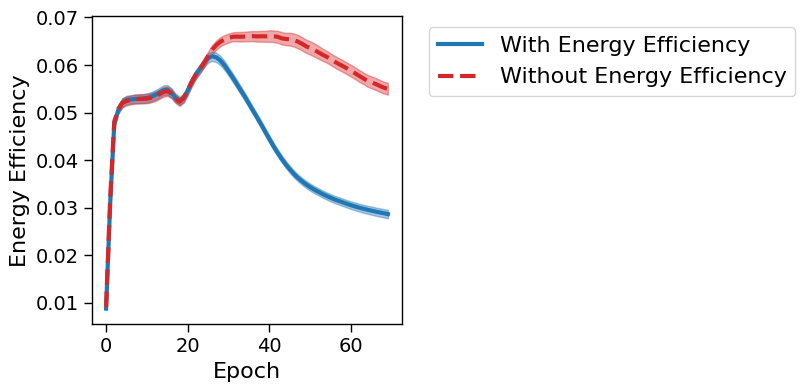

In [12]:
# Energy efficiency training progress

with plt.style.context(['nature', 'notebook']):

    energy_loss_fig, energy_loss_ax = plt.subplots(figsize=(4, 4))

    wo_energy_mean = energy_progress['energy'].mean(0)
    wo_energy_sem = energy_progress['energy'].std(0) / np.sqrt(energy_progress['energy'].shape[0])

    w_energy_mean = active_progress['energy'].mean(0)
    w_energy_sem = active_progress['energy'].std(0) / np.sqrt(active_progress['energy'].shape[0])


    x_range = np.arange(len(w_energy_mean))
    energy_loss_ax.plot(x_range, w_energy_mean, label='With Energy Efficiency', color='tab:blue', linewidth=3.0)
    energy_loss_ax.plot(x_range, wo_energy_mean, '--', label='Without Energy Efficiency', color='tab:red', linewidth=3.0)

    energy_loss_ax.fill_between(x_range,
                                w_energy_mean - w_energy_sem,
                                w_energy_mean + w_energy_sem,
                                color='tab:blue', alpha=0.4)
    energy_loss_ax.fill_between(x_range,
                                wo_energy_mean - wo_energy_sem,
                                wo_energy_mean + wo_energy_sem,
                                color='tab:red', alpha=0.4)
    energy_loss_ax.tick_params(axis='both', which='major', labelsize=14)

    energy_loss_ax.set_xlabel('Epoch')
    energy_loss_ax.set_ylabel('Energy Efficiency')
    energy_loss_ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
energy_loss_fig.savefig("../figures/figure_5/no_energy_train_progress.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

#### Prediction Error

In [3]:
# load results for the full model
nopred_args, nopred_change, nopred_omission, nopred_progress = load_results_files("../results/main_model", "no_pred")
nopred_args = Namespace(**nopred_args)

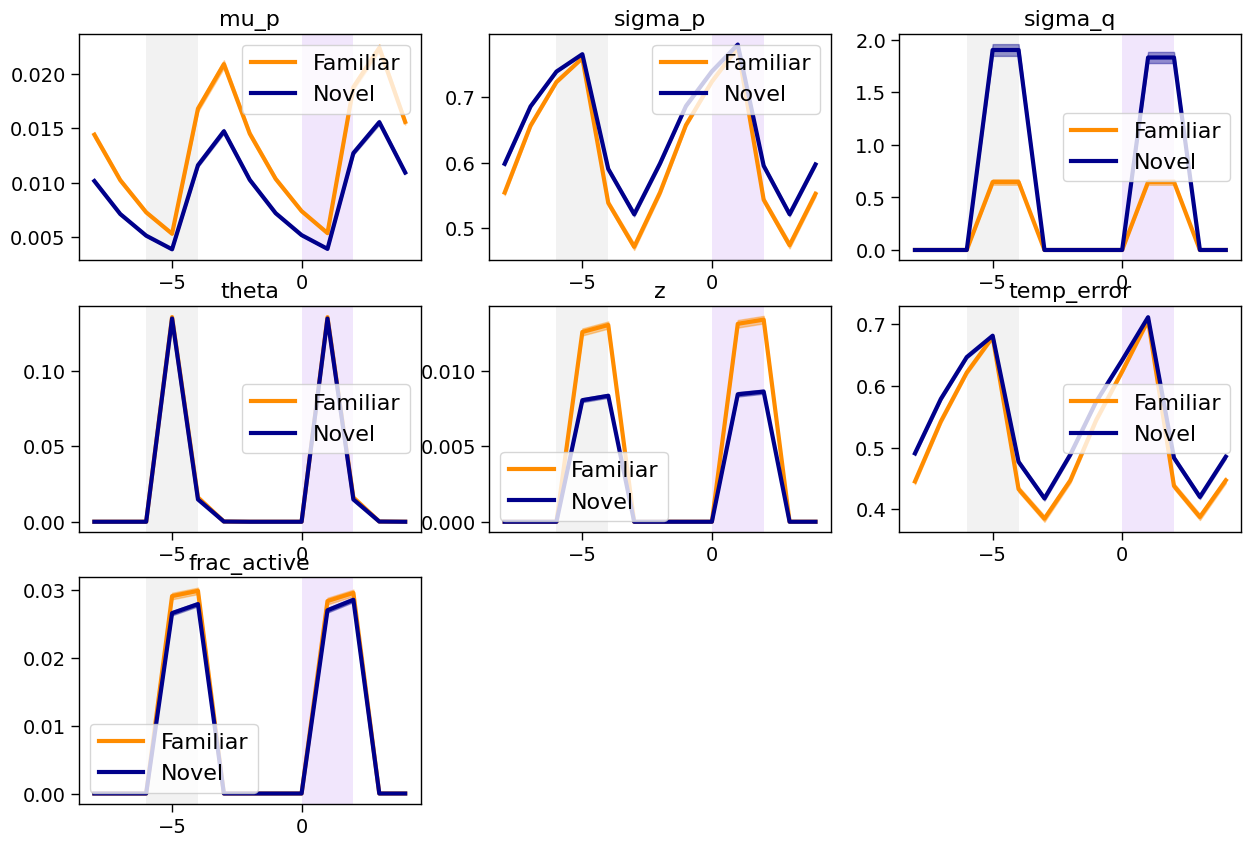

In [4]:
# Change Responses

with plt.style.context(['nature', 'notebook']):

    nopred_change_fig = plt.figure(figsize=(15, 10))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(nopred_change['familiar'].keys()):
        ax = plt.subplot(3, 3, i+1)
        _ = plot_trial_responses(nopred_args, ax, nopred_change['familiar'][pop], nopred_change['novel'][pop], normalize=False)
        _ = ax.set_title(f"{pop}")
        _ = ax.legend()

In [15]:
nopred_change_fig.savefig("../figures/figure_5/no_pred_change_responses.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

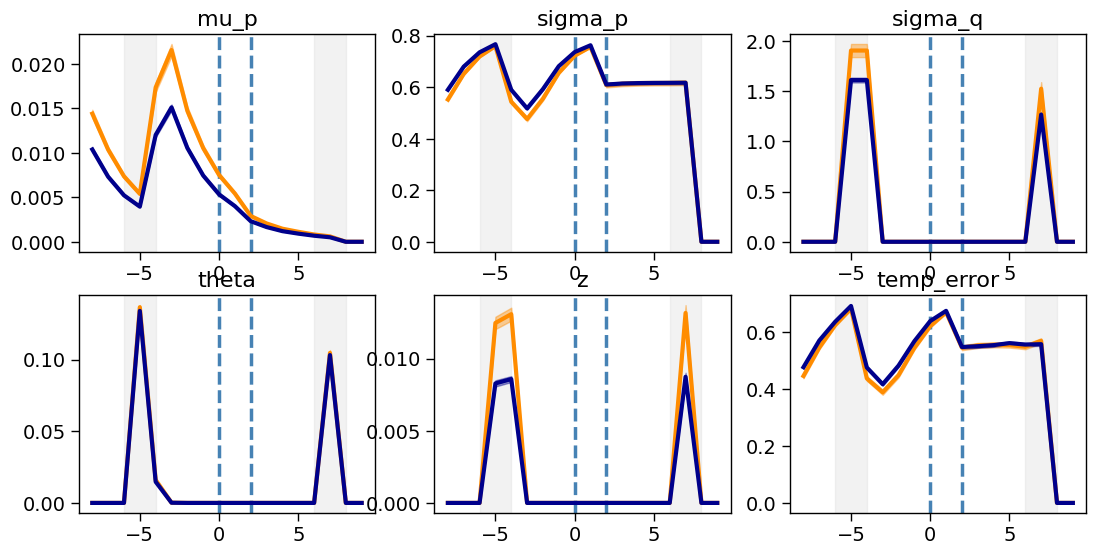

In [15]:
##### plot responses around omissions

with plt.style.context(['nature', 'notebook']):

    nopred_omission_fig = plt.figure(figsize=(13, 13))
    #plt.tight_layout(pad=19, h_pad=15)

    for i, pop in enumerate(nopred_omission['familiar'].keys()):
        ax = plt.subplot(4, 3, i+1)
        plot_trial_responses(nopred_args, ax, nopred_omission['familiar'][pop], nopred_omission['novel'][pop], trial_mode='omission', normalize=False)
        _ = ax.set_title(f"{pop}")

In [16]:
nopred_omission_fig.savefig("../figures/figure_5/no_pred_omission_responses.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

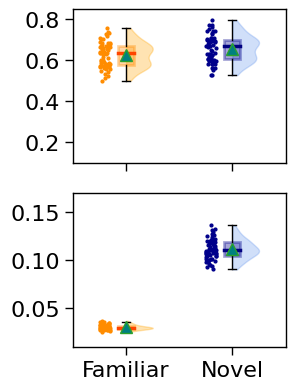

In [ ]:
# Raincloud plots

with plt.style.context(['nature', 'notebook']):

    fam_pa = active_change['familiar_means']['sigma_p'].detach()
    nov_pa = active_change['novel_means']['sigma_p'].detach()

    fam_nopred = nopred_change['familiar_means']['sigma_p'].detach()
    nov_nopred = nopred_change['novel_means']['sigma_p'].detach()
    
    vip_nopred_rain, vip_nopred_rain_ax = plt.subplots(2, 1, figsize=(3, 4), sharex=True)
    plt.tight_layout()

    # perception only
    raincloud_plot(vip_nopred_rain_ax[0], fam_nopred.mean(-1).mean(0), nov_nopred.mean(-1).mean(0), xlabels=['Familiar', 'Novel'], marker_sz=4, color_scheme=2)
    raincloud_plot(vip_nopred_rain_ax[1], fam_pa.mean(-1).mean(0), nov_pa.mean(-1).mean(0), xlabels=['Familiar', 'Novel'], marker_sz=4, color_scheme=2)

    vip_nopred_rain_ax[0].set_ylim([0.1, 0.85])
    vip_nopred_rain_ax[1].set_ylim([0.01, 0.17])

    vip_nopred_rain_ax[0].set_ylabel('')
    vip_nopred_rain_ax[1].set_ylabel('')

In [53]:
vip_nopred_rain.savefig("../figures/figure_5/no_pred_vip_rain.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

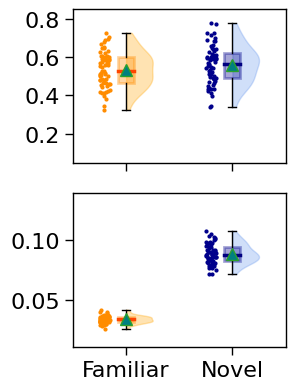

In [58]:
# Raincloud plots

with plt.style.context(['nature', 'notebook']):

    fam_pa = active_change['familiar_means']['temp_error'].detach()
    nov_pa = active_change['novel_means']['temp_error'].detach()

    fam_nopred = nopred_change['familiar_means']['temp_error'].detach()
    nov_nopred = nopred_change['novel_means']['temp_error'].detach()
    
    temp_nopred_rain, temp_nopred_rain_ax = plt.subplots(2, 1, figsize=(3, 4), sharex=True)
    plt.tight_layout()

    # perception only
    raincloud_plot(temp_nopred_rain_ax[0], fam_nopred.mean(-1).mean(0), nov_nopred.mean(-1).mean(0), xlabels=['Familiar', 'Novel'], marker_sz=4, color_scheme=2)
    raincloud_plot(temp_nopred_rain_ax[1], fam_pa.mean(-1).mean(0), nov_pa.mean(-1).mean(0), xlabels=['Familiar', 'Novel'], marker_sz=4, color_scheme=2)

    temp_nopred_rain_ax[0].set_ylim([0.05, 0.85])
    temp_nopred_rain_ax[1].set_ylim([0.01, 0.14])

    temp_nopred_rain_ax[0].set_ylabel('')
    temp_nopred_rain_ax[1].set_ylabel('')

In [59]:
temp_nopred_rain.savefig("../figures/figure_5/no_pred_temp_rain.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

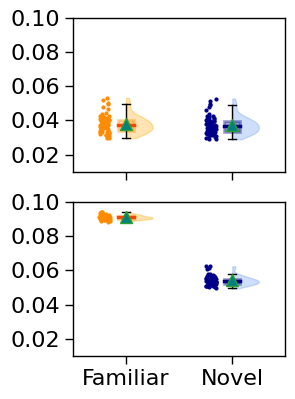

In [64]:
# Raincloud plots

with plt.style.context(['nature', 'notebook']):

    fam_pa = active_change['familiar_means']['theta'].detach()
    nov_pa = active_change['novel_means']['theta'].detach()

    fam_nopred = nopred_change['familiar_means']['theta'].detach()
    nov_nopred = nopred_change['novel_means']['theta'].detach()
    
    theta_nopred_rain, theta_nopred_rain_ax = plt.subplots(2, 1, figsize=(3, 4), sharex=True)
    plt.tight_layout()

    # perception only
    raincloud_plot(theta_nopred_rain_ax[0], fam_nopred.mean(-1).mean(0), nov_nopred.mean(-1).mean(0), xlabels=['Familiar', 'Novel'], marker_sz=4, color_scheme=2)
    raincloud_plot(theta_nopred_rain_ax[1], fam_pa.mean(-1).mean(0), nov_pa.mean(-1).mean(0), xlabels=['Familiar', 'Novel'], marker_sz=4, color_scheme=2)

    theta_nopred_rain_ax[0].set_ylim([0.01, 0.10])
    theta_nopred_rain_ax[1].set_ylim([0.01, 0.10])

    theta_nopred_rain_ax[0].set_ylabel('')
    theta_nopred_rain_ax[1].set_ylabel('')

In [65]:
theta_nopred_rain.savefig("../figures/figure_5/no_pred_theta_rain.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

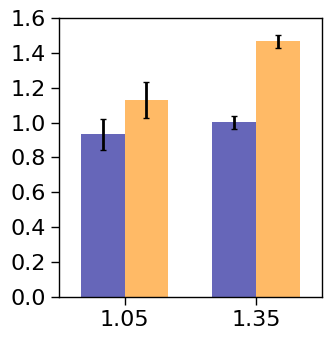

In [76]:
# d-prime bar plot

# Fraction active bar plot

with plt.style.context(['nature', 'notebook']):

    fam_len, nov_len = len(active_progress['dprime']), len(active_progress['dprime_novel'])
    fam_nopred_len, nov_nopred_len = len(nopred_progress['dprime']), len(nopred_progress['dprime_novel'])

    # fraction active in the full model case average across prechange and change
    pa_fam, pa_fam_err = compute_population_stats(active_progress['dprime'][:, -1], alpha=0.05)
    pa_nov, pa_nov_err = compute_population_stats(active_progress['dprime_novel'][:, -1], alpha=0.05)

    # fraction active in the no energy case averaged across prechange and change
    nopred_fam, nopred_fam_err = compute_population_stats(nopred_progress['dprime'][:, -1], alpha=0.05)
    nopred_nov, nopred_nov_err = compute_population_stats(nopred_progress['dprime_novel'][:, -1], alpha=0.05)

    pa_fam_err = active_progress['dprime'][:, -1].std() / np.sqrt(fam_len)
    pa_nov_err = active_progress['dprime_novel'][:, -1].std() / np.sqrt(nov_len)
    nopred_fam_err = nopred_progress['dprime'][:, -1].std() / np.sqrt(fam_nopred_len)
    nopred_nov_err = nopred_progress['dprime_novel'][:, -1].std() / np.sqrt(nov_nopred_len)

    dprime_nopred_fig, dprime_ax = plt.subplots(figsize=(3.33, 3.33))

    dprime_ax.bar(
        x = [1., 1.3],
        height=[nopred_nov, pa_nov],
        yerr=[nopred_nov_err, pa_nov_err],
        width=0.1,
        align='center',
        color=(NOV_CLR, NOV_CLR),
        alpha=0.6,
        capsize=2,
        label='Novel'
    )

    dprime_ax.bar(
        x = [1.1, 1.4],
        height=[nopred_fam, pa_fam],
        yerr=[nopred_fam_err, pa_fam_err],
        width=0.1,
        align='center',
        color=(FAM_CLR, FAM_CLR),
        alpha=0.6,
        capsize=2,
        label='Familiar'
    )

    dprime_ax.set_xticks([1.05, 1.35])
    #frac_ax.set_xticklabels(['Without prediction loss', 'With prediction loss'])
    
    dprime_ax.set_ylim([0., 1.6])
    dprime_ax.set_xlim([0.9, 1.5])
    #frac_ax.legend()

    plt.tight_layout()
    

In [77]:
dprime_nopred_fig.savefig("../figures/figure_5/dprime_no_pred.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

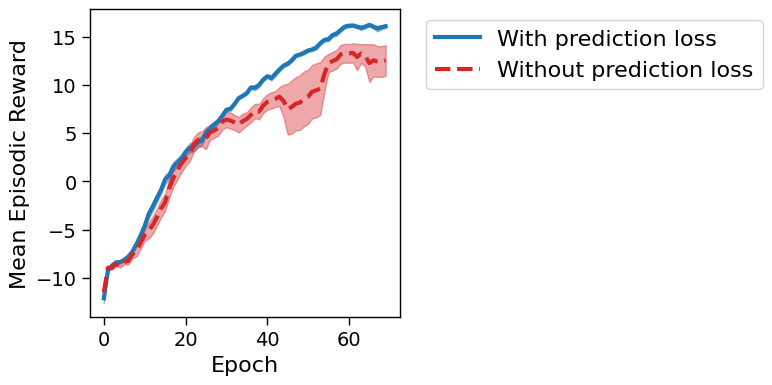

In [17]:
# Episode rewards progress

with plt.style.context(['nature', 'notebook']):

    key = "episode_rewards"

    nopred_rew_fig, nopred_rew_ax = plt.subplots(figsize=(4, 4))

    nopred_mean = nopred_progress[key].mean(0)
    nopred_sem = nopred_progress[key].std(0) / np.sqrt(nopred_progress[key].shape[0])

    full_mean = active_progress[key].mean(0)
    full_sem = active_progress[key].std(0) / np.sqrt(active_progress[key].shape[0])


    x_range = np.arange(len(full_mean))
    nopred_rew_ax.plot(x_range, full_mean, label='With prediction loss', color='tab:blue', linewidth=3.0)
    nopred_rew_ax.plot(x_range, nopred_mean, '--', label='Without prediction loss', color='tab:red', linewidth=3.0)

    nopred_rew_ax.fill_between(x_range,
                                full_mean - full_sem,
                                full_mean + full_sem,
                                color='tab:blue', alpha=0.4)
    nopred_rew_ax.fill_between(x_range,
                                nopred_mean - nopred_sem,
                                nopred_mean + nopred_sem,
                                color='tab:red', alpha=0.4)
    nopred_rew_ax.tick_params(axis='both', which='major', labelsize=14)

    nopred_rew_ax.set_xlabel('Epoch')
    nopred_rew_ax.set_ylabel('Mean Episodic Reward')
    nopred_rew_ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
nopred_rew_fig.savefig("../figures/figure_5/reward_no_pred.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

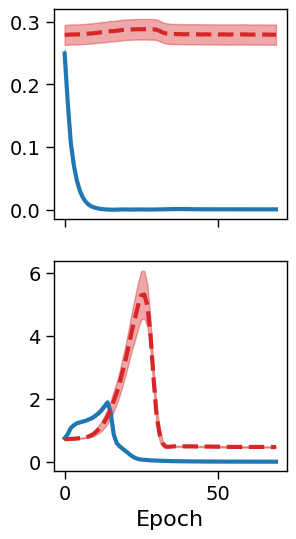

In [28]:
# Episode rewards progress

with plt.style.context(['nature', 'notebook']):

    key1 = "spatial_error"
    key2 = "temporal_error"

    nopred_loss_fig, nopred_loss_ax = plt.subplots(2, 1, figsize=(3, 6), sharex=True)

    nopred_mean = nopred_progress[key1].mean(0)
    nopred_sem = nopred_progress[key1].std(0) / np.sqrt(nopred_progress[key1].shape[0])

    full_mean = active_progress[key1].mean(0)
    full_sem = active_progress[key1].std(0) / np.sqrt(active_progress[key1].shape[0])


    x_range = np.arange(len(full_mean))
    nopred_loss_ax[0].plot(x_range, full_mean, label='With prediction loss', color='tab:blue', linewidth=3.0)
    nopred_loss_ax[0].plot(x_range, nopred_mean, '--', label='Without prediction loss', color='tab:red', linewidth=3.0)

    nopred_loss_ax[0].fill_between(x_range,
                                full_mean - full_sem,
                                full_mean + full_sem,
                                color='tab:blue', alpha=0.4)
    nopred_loss_ax[0].fill_between(x_range,
                                nopred_mean - nopred_sem,
                                nopred_mean + nopred_sem,
                                color='tab:red', alpha=0.4)
    nopred_loss_ax[0].tick_params(axis='both', which='major', labelsize=14)


    nopred_mean = nopred_progress[key2].mean(0)
    nopred_sem = nopred_progress[key2].std(0) / np.sqrt(nopred_progress[key2].shape[0])

    full_mean = active_progress[key2].mean(0)
    full_sem = active_progress[key2].std(0) / np.sqrt(active_progress[key2].shape[0])


    x_range = np.arange(len(full_mean))
    nopred_loss_ax[1].plot(x_range, full_mean, label='With prediction loss', color='tab:blue', linewidth=3.0)
    nopred_loss_ax[1].plot(x_range, nopred_mean, '--', label='Without prediction loss', color='tab:red', linewidth=3.0)

    nopred_loss_ax[1].fill_between(x_range,
                                full_mean - full_sem,
                                full_mean + full_sem,
                                color='tab:blue', alpha=0.4)
    nopred_loss_ax[1].fill_between(x_range,
                                nopred_mean - nopred_sem,
                                nopred_mean + nopred_sem,
                                color='tab:red', alpha=0.4)
    nopred_loss_ax[1].tick_params(axis='both', which='major', labelsize=14)


    nopred_loss_ax[1].set_xlabel('Epoch')
    #nopred_loss_ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [31]:
nopred_loss_fig.savefig("../figures/figure_5/predloss_no_pred.pdf", dpi=600, bbox_inches="tight", pad_inches=0)